In [37]:
import yfinance as yf

stock_data = yf.download('DAC', start='2014-02-21', end='2024-02-21')
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-21,86.800003,90.440002,86.379997,88.199997,76.762558,1179
2014-02-24,88.339996,90.440002,86.660004,89.599998,77.981026,2021
2014-02-25,89.599998,90.160004,86.660004,88.480003,77.006264,1571
2014-02-26,89.320000,89.739998,86.800003,89.040001,77.493645,1600
2014-02-27,88.199997,89.320000,85.120003,87.360001,76.031494,2164
...,...,...,...,...,...,...
2024-02-13,75.989998,76.440002,74.970001,75.449997,73.291382,110400
2024-02-14,72.650002,74.949997,72.019997,72.570000,70.493774,189800
2024-02-15,72.360001,72.849998,71.660004,72.040001,69.978943,128700


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

In [39]:
import numpy as np

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [40]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)

train_size=0.8
X_train, X_test = X[:int(X.shape[0]*train_size)], X[int(X.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64))
model.add(LSTM(units=64))
model.add(Dense(units=64))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - loss: 0.0410
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0016
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - loss: 0.0012
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0012
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - loss: 0.0011
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0012
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 9.8480e-04
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - loss: 0.0011
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 9.4174e-04
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0010


In [ ]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

16/16 [==============================] - 2s 28ms/step - loss: 9.9067e-04
Test Loss: 0.000990670407190919


In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 27ms/step


In [ ]:
original_data = stock_data['Close'].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)

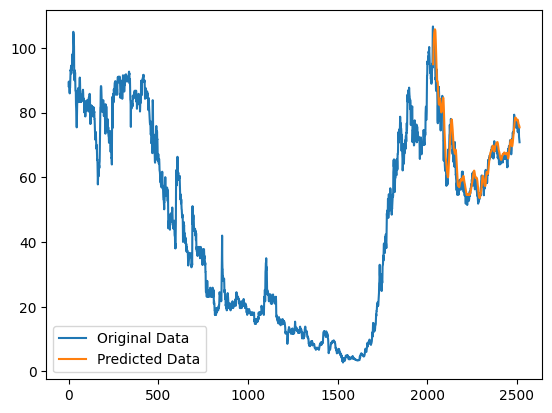

In [ ]:
import matplotlib.pyplot as plt

plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()